<a href="https://colab.research.google.com/github/Brotherswords/DeepLearning_Project/blob/main/CSCI4931_WUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Brian H., Jake M., Lavan V., Matthew W.
# CSCI 4931 - Deep Learning Final Project
# Wave-U-Net ح

In [2]:
# Environment
# !pip install librosa tensorflow
# !pip install tensorflow

In [3]:
# !pip install tensorflow

In [4]:
# Wave-U-Net Model
import tensorflow as tf
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling1D
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D, Concatenate, Normalization, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Normalization, BatchNormalization


In [5]:
print(tf.__version__)

2.14.0


In [6]:
# mount Google Drive to the Colab VM
from google.colab import drive
import os
import zipfile

drive.mount('/content/drive')

# Mount Google Drive
# drive.mount("/content/drive", force_remount=True)

# Replace 'YourFolderName' with the name of your folder
# folder_path = '/content/drive/My Drive/datasets/DSD100subset.zip'
folder_path = '/content/drive/My Drive/datasets/DSD100.zip'


# # List all files in the directory -> use this to figure out the exact
# for file in os.listdir(folder_path):
#     print(file)
print("Mounted Successfully")


Mounted at /content/drive
Mounted Successfully


In [7]:
import zipfile

# Path to the zip file
# Its not Gojover yet
# Path to the DSD100 zip file
zip_file_path = '/content/drive/My Drive/datasets/DSD100.zip'

# TEST SUBSET !!!!
# zip_file_path = '/content/drive/My Drive/datasets/DSD100subset.zip'


# Function to process the zip file
mixtures_dict = {}
sources_dict = {}

# Function to process the zip file
def process_dsd100_zip(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file in zip_ref.namelist():
            if 'Mixtures/Test/' in file and file.endswith('mixture.wav'):
                key = file.split('/')[-2]  # Extract song key
                # print(key)
                mixtures_dict[key] = file
            elif 'Sources/Test/' in file and file.endswith(('.wav')):
                key = file.split('/')[-2]  # Extract song key
                if key not in sources_dict:
                    sources_dict[key] = []
                sources_dict[key].append(file)


# Process the DSD100 zip file
process_dsd100_zip(zip_file_path)


# Create Mixtures and Sources lists
Mixtures = []
Sources = []


for key, mixture_path in mixtures_dict.items():
    Mixtures.append(mixture_path)
    Sources.append(sources_dict.get(key, []))  # Get the sources, or an empty list if not found


# Displaying the first few paths for verification
print("First mixture:", Mixtures[0])
print("First source tuple:", Sources[0])


# # Open the zip file and list its contents
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     for file in zip_ref.namelist():
#         print(file)

First mixture: DSD100/Mixtures/Test/050 - Zeno - Signs/mixture.wav
First source tuple: ['DSD100/Sources/Test/050 - Zeno - Signs/vocals.wav', 'DSD100/Sources/Test/050 - Zeno - Signs/other.wav', 'DSD100/Sources/Test/050 - Zeno - Signs/drums.wav', 'DSD100/Sources/Test/050 - Zeno - Signs/bass.wav']


In [8]:
#Play the music to show that it is working
# from IPython.display import Audio

# def extract_and_play(file_path_in_zip):
#     with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#         if file_path_in_zip in zip_ref.namelist():
#             # Create a complete path for extraction
#             filename = os.path.basename(file_path_in_zip)
#             temp_path = '/tmp/' + filename
#             # Extract the file
#             zip_ref.extract(file_path_in_zip, '/tmp/')
#             extracted_file_path = os.path.join('/tmp/', file_path_in_zip)
#             print(f"Extracted to: {extracted_file_path}")

#             # Check if the file exists at the extracted path
#             if os.path.exists(extracted_file_path):
#                 print(extracted_file_path)
#                 return Audio(filename=extracted_file_path)
#             else:
#                 print("Extracted file not found.")
#                 return None
#         else:
#             print("File not found in the zip archive.")
#             return None

# if Mixtures:
#     audio_widget = extract_and_play(Mixtures[0])
#     if audio_widget is not None:
#         print("Valid audio widget")
#         display(audio_widget)
#     else:
#         print("Audio_widget is none")
# else:
#     print("Mixtures list is empty.")

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')



```
# This is formatted as code
```

Worth an investigation possibly: https://www.tensorflow.org/api_docs/python/tf/keras/layers/DepthwiseConv1D

In [10]:
# Optimizer Func
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
optimizer = tf.optimizers.Adam(learning_rate=0.001)

In [11]:
# Loss Function
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError
loss_func = tf.keras.losses.MeanSquaredError()

In [12]:
# Metrics
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [13]:
#Extracting all the mixture files into a temp location not files :3
import shutil
from IPython.display import Audio
import os
import zipfile

mixtures_train = []

def extract_and_play_attempt(file_path_in_zip, some_string_as_input):
    # Create the directory if it does not exist
    target_directory = '/tmp/train-mix/'
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        if file_path_in_zip in zip_ref.namelist():
            # Extract the original file name and create a new file name
            original_filename = os.path.basename(file_path_in_zip)
            new_filename = f"{some_string_as_input} - {original_filename}"
            extracted_file_path = os.path.join(target_directory, new_filename)
            mixtures_train.append(extracted_file_path)

            # Read the file data from the zip file
            with zip_ref.open(file_path_in_zip) as source_file:
                # Write the file data to the new file in the target directory
                with open(extracted_file_path, 'wb') as target_file:
                    target_file.write(source_file.read())

            print(f"Extracted to: {extracted_file_path}")

            # Check if the file exists at the extracted path
            if os.path.exists(extracted_file_path):
                print(extracted_file_path)
                return Audio(filename=extracted_file_path)
            else:
                print("Extracted file not found.")
                return None
        else:
            print("File not found in the zip archive.")
            return None

def get_second_to_last_value(input_string, delimiter):
    """
    Splits the input string using the given delimiter and returns the second-to-last value
    from the resulting split array. If the array has less than two elements, returns None.

    :param input_string: The string to be split
    :param delimiter: The delimiter to use for splitting the string
    :return: The second-to-last value from the split array or None
    """
    parts = input_string.split(delimiter)
    if len(parts) >= 2:
        return parts[-2]  # Get the second-to-last element
    else:
        return None

storage_location = []
for idx in range(len(Mixtures)):
  mix = Mixtures[idx]
  append_name = get_second_to_last_value(mix, "/")
  print("Amogus", mix)
  filename = os.path.basename(mix)
  print(filename)
  local_path = '/tmp/train-mix/' + str(idx) + filename
  extract_and_play_attempt(mix, append_name)

print("Extracted Mixtures to test Location")

Amogus DSD100/Mixtures/Test/050 - Zeno - Signs/mixture.wav
mixture.wav
Extracted to: /tmp/train-mix/050 - Zeno - Signs - mixture.wav
/tmp/train-mix/050 - Zeno - Signs - mixture.wav
Amogus DSD100/Mixtures/Test/048 - We Fell From The Sky - Not You/mixture.wav
mixture.wav
Extracted to: /tmp/train-mix/048 - We Fell From The Sky - Not You - mixture.wav
/tmp/train-mix/048 - We Fell From The Sky - Not You - mixture.wav
Amogus DSD100/Mixtures/Test/047 - Voelund - Comfort Lives In Belief/mixture.wav
mixture.wav
Extracted to: /tmp/train-mix/047 - Voelund - Comfort Lives In Belief - mixture.wav
/tmp/train-mix/047 - Voelund - Comfort Lives In Belief - mixture.wav
Amogus DSD100/Mixtures/Test/046 - Triviul - Dorothy/mixture.wav
mixture.wav
Extracted to: /tmp/train-mix/046 - Triviul - Dorothy - mixture.wav
/tmp/train-mix/046 - Triviul - Dorothy - mixture.wav
Amogus DSD100/Mixtures/Test/045 - Traffic Experiment - Sirens/mixture.wav
mixture.wav
Extracted to: /tmp/train-mix/045 - Traffic Experiment - Si

In [14]:
separation_train = []
def extract_files_separation(file_paths_in_zip, subfolder_name):
    # Create the base directory if it does not exist
    base_directory = '/tmp/train-sep/'
    if not os.path.exists(base_directory):
        os.makedirs(base_directory)

    # Create the subfolder directory
    target_directory = os.path.join(base_directory, subfolder_name)
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file_path in file_paths_in_zip:
            if file_path in zip_ref.namelist():
                # Get the file name and create the path in the subfolder
                filename = os.path.basename(file_path)
                extracted_file_path = os.path.join(target_directory, filename)
                separation_train.append(extracted_file_path)
                # Read the file data from the zip file
                with zip_ref.open(file_path) as source_file:
                    # Write the file data to the new file in the target directory
                    with open(extracted_file_path, 'wb') as target_file:
                        target_file.write(source_file.read())

                print(f"Extracted to: {extracted_file_path}")
            else:
                print(f"File not found in the zip archive: {file_path}")

# Example usage
storage_location = []
for idx in range(len(Sources)):
  sep = Sources[idx]
  append_name = get_second_to_last_value(sep[0], "/")
  print("Amogus", sep)
  local_path = '/tmp/train-mix/' + str(idx) + filename
  extract_files_separation(sep, append_name)
print(len(separation_train))

Amogus ['DSD100/Sources/Test/050 - Zeno - Signs/vocals.wav', 'DSD100/Sources/Test/050 - Zeno - Signs/other.wav', 'DSD100/Sources/Test/050 - Zeno - Signs/drums.wav', 'DSD100/Sources/Test/050 - Zeno - Signs/bass.wav']
Extracted to: /tmp/train-sep/050 - Zeno - Signs/vocals.wav
Extracted to: /tmp/train-sep/050 - Zeno - Signs/other.wav
Extracted to: /tmp/train-sep/050 - Zeno - Signs/drums.wav
Extracted to: /tmp/train-sep/050 - Zeno - Signs/bass.wav
Amogus ['DSD100/Sources/Test/048 - We Fell From The Sky - Not You/vocals.wav', 'DSD100/Sources/Test/048 - We Fell From The Sky - Not You/other.wav', 'DSD100/Sources/Test/048 - We Fell From The Sky - Not You/drums.wav', 'DSD100/Sources/Test/048 - We Fell From The Sky - Not You/bass.wav']
Extracted to: /tmp/train-sep/048 - We Fell From The Sky - Not You/vocals.wav
Extracted to: /tmp/train-sep/048 - We Fell From The Sky - Not You/other.wav
Extracted to: /tmp/train-sep/048 - We Fell From The Sky - Not You/drums.wav
Extracted to: /tmp/train-sep/048 - 

In [15]:
def get_key(file_path):
    """
    Splits the file path by "/" and returns the first three characters of the last element.

    :param file_path: The file path string.
    :return: The first three characters of the file name.
    """
    # Split the file path by "/"
    parts = file_path.split('/')

    # Get the last element of the parts list
    file_name = parts[-1]

    # Return the first three characters of the file name
    return file_name[:3]

In [16]:
def get_key_sep(file_path):
    """
    Splits the file path by "/" and returns the first three characters of the last element.

    :param file_path: The file path string.
    :return: The first three characters of the file name.
    """
    # Split the file path by "/"
    parts = file_path.split('/')

    # Get the last element of the parts list
    file_name = parts[-2]

    # Return the first three characters of the file name
    return file_name[:3]

In [ ]:
import librosa
import numpy as np

lengths = []
for file_path in audio_files:  # Replace with your list of file paths
    audio, sr = librosa.load(file_path, sr=None)
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))
    lengths.append(spectrogram.shape[1])

# Choose your percentile (e.g., 90th percentile)
percentile = 90

# Calculate the desired_length
desired_length = int(np.percentile(lengths, percentile))

print(f"Desired Length (at {percentile}th percentile): {desired_length}")


Desired Length (at 50th percentile): 20680


In [55]:
import librosa
import numpy as np
import os
from collections import defaultdict
from tensorflow.keras.utils import Sequence

spect_mixtures_map = {}

segment_length = 10  # 10 seconds
sr = 22050  # Sample rate
n_fft = 2048
hop_length = 512


def audio_length_to_time_steps(audio_length, sr, n_fft, hop_length):
    """
    Convert audio length in seconds to number of time steps in the spectrogram.

    :param audio_length: Length of the audio in seconds.
    :param sr: Sample rate of the audio.
    :param n_fft: Number of FFT components.
    :param hop_length: Number of samples between successive frames.
    :return: Number of time steps in the spectrogram.
    """
    # Calculate the total number of samples
    num_samples = int(audio_length * sr)

    # Calculate the number of time steps in the spectrogram
    num_time_steps = (num_samples - n_fft) // hop_length + 1

    return num_time_steps


desired_length = audio_length_to_time_steps(segment_length, sr, n_fft, hop_length)



class DataGenerator(Sequence):
    """
    DataGenerator is a custom class that inherits from Sequence.
    It generates data in batches, which is efficient for memory usage.
    The generator can be directly used with Keras's model.fit method for training.
    """
    def __init__(self, file_paths, batch_size, n_fft, hop_length, desired_length, sr=22050):
        self.file_paths = file_paths
        self.batch_size = batch_size
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.desired_length = desired_length
        self.sr = sr

    def __len__(self):
        return int(np.ceil(len(self.file_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_paths = self.file_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_spectrograms = [audio_to_spectrogram_mixture(path, self.n_fft, self.hop_length, self.desired_length) for path in batch_paths]
        batch_spectrograms = np.array(batch_spectrograms)
        return batch_spectrograms

# # Usage
# file_paths = ['path/to/segment1.wav', 'path/to/segment2.wav', ...]  # Paths to your audio segments
# batch_size = 32  # Adjust based on your system's capabilities
# data_generator = DataGenerator(file_paths, batch_size, n_fft, hop_length, desired_length)

# # During training
# model.fit(data_generator, epochs=10, ...)

# For Mixtures
def audio_to_spectrogram_mixture(file_path, n_fft=2048, hop_length=512, desired_length=20680):
    """
    Convert an audio file to a spectrogram with an added channel dimension.

    :param file_path: Path to the audio file.
    :param n_fft: Number of FFT components.
    :param hop_length: Number of samples between successive frames.
    :param desired_length: The desired number of time steps in the spectrogram.
    :return: Spectrogram of the audio file with shape (time, frequency, 1).
    """
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Compute the Short-Time Fourier Transform (STFT)
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    # Convert to logarithmic scale
    spectrogram = librosa.amplitude_to_db(spectrogram)

    # Trimming or Padding the Spectrogram to a fixed size
    if desired_length is not None:
        if spectrogram.shape[1] > desired_length:
            # Trim the spectrogram
            spectrogram = spectrogram[:, :desired_length]
        else:
            # Pad the spectrogram
            padding = desired_length - spectrogram.shape[1]
            spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')

    # Add a channel dimension
    spectrogram = np.expand_dims(spectrogram, axis=-1)

    spect_mixtures_map[get_key(file_path)] = spectrogram

    return spectrogram


spect_seperate_map = defaultdict(list)


# {[[bass.spectrogram],[drums-spectr]...]}
def audio_to_spectrogram_seperate(file_path, n_fft=2048, hop_length=512, desired_length=20680):
    """
    Convert an audio file to a spectrogram with an added channel dimension.

    :param file_path: Path to the audio file.
    :param n_fft: Number of FFT components.
    :param hop_length: Number of samples between successive frames.
    :param desired_length: The desired number of time steps in the spectrogram.
    :return: Spectrogram of the audio file with shape (time, frequency, 1).
    """
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Compute the Short-Time Fourier Transform (STFT)
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    # Convert to logarithmic scale
    spectrogram = librosa.amplitude_to_db(spectrogram)

    # Trimming or Padding the Spectrogram to a fixed size
    if desired_length is not None:
        if spectrogram.shape[1] > desired_length:
            # Trim the spectrogram
            spectrogram = spectrogram[:, :desired_length]
        else:
            # Pad the spectrogram
            padding = desired_length - spectrogram.shape[1]
            spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), mode='constant')

    # Add a channel dimension
    spectrogram = np.expand_dims(spectrogram, axis=-1)

    spect_seperate_map[get_key_sep(file_path)].append(spectrogram)

    return spectrogram



# Now, 'spectrograms' contains the spectrogram of each audio file


In [56]:
print(mixtures_train)

['/tmp/train-mix/050 - Zeno - Signs - mixture.wav', '/tmp/train-mix/048 - We Fell From The Sky - Not You - mixture.wav', '/tmp/train-mix/047 - Voelund - Comfort Lives In Belief - mixture.wav', '/tmp/train-mix/046 - Triviul - Dorothy - mixture.wav', '/tmp/train-mix/045 - Traffic Experiment - Sirens - mixture.wav', '/tmp/train-mix/044 - Tom McKenzie - Directions - mixture.wav', '/tmp/train-mix/043 - Timboz - Pony - mixture.wav', "/tmp/train-mix/042 - The Wrong'Uns - Rothko - mixture.wav", '/tmp/train-mix/041 - The Mountaineering Club - Mallory - mixture.wav', '/tmp/train-mix/040 - The Long Wait - Back Home To Blue - mixture.wav', '/tmp/train-mix/039 - Swinging Steaks - Lost My Way - mixture.wav', "/tmp/train-mix/038 - Spike Mullings - Mike's Sulking - mixture.wav", '/tmp/train-mix/037 - Speak Softly - Broken Man - mixture.wav', '/tmp/train-mix/036 - Skelpolu - Resurrection - mixture.wav', '/tmp/train-mix/035 - Signe Jakobsen - What Have You Done To Me - mixture.wav', '/tmp/train-mix/034 

In [57]:
print(separation_train)

['/tmp/train-sep/050 - Zeno - Signs/vocals.wav', '/tmp/train-sep/050 - Zeno - Signs/other.wav', '/tmp/train-sep/050 - Zeno - Signs/drums.wav', '/tmp/train-sep/050 - Zeno - Signs/bass.wav', '/tmp/train-sep/048 - We Fell From The Sky - Not You/vocals.wav', '/tmp/train-sep/048 - We Fell From The Sky - Not You/other.wav', '/tmp/train-sep/048 - We Fell From The Sky - Not You/drums.wav', '/tmp/train-sep/048 - We Fell From The Sky - Not You/bass.wav', '/tmp/train-sep/047 - Voelund - Comfort Lives In Belief/drums.wav', '/tmp/train-sep/047 - Voelund - Comfort Lives In Belief/other.wav', '/tmp/train-sep/047 - Voelund - Comfort Lives In Belief/bass.wav', '/tmp/train-sep/047 - Voelund - Comfort Lives In Belief/vocals.wav', '/tmp/train-sep/046 - Triviul - Dorothy/other.wav', '/tmp/train-sep/046 - Triviul - Dorothy/vocals.wav', '/tmp/train-sep/046 - Triviul - Dorothy/bass.wav', '/tmp/train-sep/046 - Triviul - Dorothy/drums.wav', '/tmp/train-sep/045 - Traffic Experiment - Sirens/other.wav', '/tmp/tra

In [58]:
spectrograms_mixtures_train = [audio_to_spectrogram_mixture(file) for file in mixtures_train]


In [59]:
# separation_train = np.array_split(separation_train, 5)

In [60]:
# save_index = 4

In [61]:
spectrograms_seperations_train = [audio_to_spectrogram_seperate(file) for file in separation_train]


In [62]:
# print(spect_mixtures_map["050"])
# print(spect_seperate_map["050"])
# print(len(spect_seperate_map["050"]))


### Note: Pickle commands DEVOUR RAM,so if you're training or something don't do this.



In [63]:

# import pickle

# pickle_mixture_file_path = '/content/drive/My Drive/datasets/spectrogram_mixture_train_data.pkl'

# pickle_spec_file_path = f'/content/drive/My Drive/datasets/spectrogram_spec_train_data{save_index}.pkl'

# # with open(pickle_mixture_file_path, 'wb') as f:
# #     pickle.dump(spectrograms_mixtures_train, f)

# with open(pickle_spec_file_path, 'wb') as f:
#     pickle.dump(spectrograms_seperations_train, f)

### This should be our training data.

In [68]:
# Assuming spect_mixtures_map and spect_seperate_map are predefined dictionaries
# Example: Check if a key exists and print a message if it doesn't
# for i in range(1, 51):
#     key = f"{i:03}"
#     if key not in spect_mixtures_map:
#         print(f"Key {key} not found in spect_mixtures_map")
lengths_test =[]
for i in range(1, 51):
    key = f"{i:03}"
    if key in spect_mixtures_map:
        print(f"Key {key} found.")
        lengths_test.append(len(spect_mixtures_map[key]))
    else:
        print(f"Key {key} not found in spect_mixtures_map")


# Create an array with values from spect_mixtures_map in order
spect_mixtures_array = [spect_mixtures_map[f"{i:03}"] for i in range(1, 51)]

# Create an array of tuples from spect_seperate_map
spect_separate_tuples = [spect_seperate_map[f"{i:03}"] for i in range(1, 51)]

# # Printing the first element to verify
# print(spect_mixtures_array[0])  # Should correspond to spect_mixtures_map["001"]
# print(spect_separate_tuples[0])  # Should correspond to spect_seperate_map["001"]

# #both of these should be 50
# print(len(spect_mixtures_array))
# print(len(spect_separate_tuples))

# Safely create the arrays with a fallback for missing keys
spect_mixtures_array = [spect_mixtures_map.get(f"{i:03}", None) for i in range(1, 51)]
spect_separate_tuples = [spect_seperate_map.get(f"{i:03}", None) for i in range(1, 51)]

# Verify the first elements and the length of the arrays
if spect_mixtures_array and spect_separate_tuples:
    # print(spect_mixtures_array[0])  # First element in spect_mixtures_array
    # print(spect_separate_tuples[0])  # First element in spect_seperate_tuples
    print(len(spect_mixtures_array))  # Length of spect_mixtures_array
    print(len(spect_separate_tuples))  # Length of spect_seperate_tuples

average = sum(lengths_test) / len(lengths_test)
print(max(lengths_test))
print(min(lengths_test))
print(average)


Key 001 found.
Key 002 found.
Key 003 found.
Key 004 found.
Key 005 found.
Key 006 found.
Key 007 found.
Key 008 found.
Key 009 found.
Key 010 found.
Key 011 found.
Key 012 found.
Key 013 found.
Key 014 found.
Key 015 found.
Key 016 found.
Key 017 found.
Key 018 found.
Key 019 found.
Key 020 found.
Key 021 found.
Key 022 found.
Key 023 found.
Key 024 found.
Key 025 found.
Key 026 found.
Key 027 found.
Key 028 found.
Key 029 found.
Key 030 found.
Key 031 found.
Key 032 found.
Key 033 found.
Key 034 found.
Key 035 found.
Key 036 found.
Key 037 found.
Key 038 found.
Key 039 found.
Key 040 found.
Key 041 found.
Key 042 found.
Key 043 found.
Key 044 found.
Key 045 found.
Key 046 found.
Key 047 found.
Key 048 found.
Key 049 found.
Key 050 found.
50
50
1025
1025
1025.0


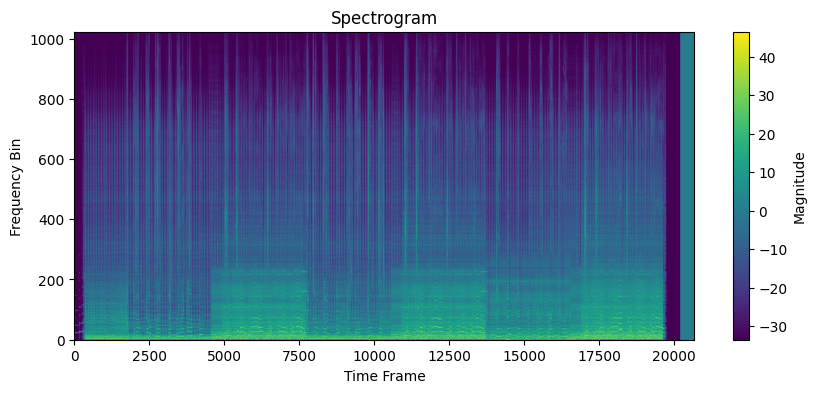

In [70]:
import matplotlib.pyplot as plt

# Assuming spectrograms_mixtures is a list of spectrogram numpy arrays
spectrogram = spect_mixtures_map["050"]

plt.figure(figsize=(10, 4))
plt.imshow(spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency Bin')
plt.xlabel('Time Frame')
plt.colorbar(label='Magnitude')
plt.show()

In [71]:
# spectrogram to audio wav conversion
import librosa.display
import soundfile as sf



# spectrograms_mixtures is a list of spectrogram numpy arrays
def spectrogram_to_audio(spectrogram, output_file, sample_rate=22050):
    """
    Converts a desired spectrogram into an audio wav and saves it

    :param spectrogram:
    :param output_file:
    :param sample_rate: int of sample rate kHz 22050

    """
    audio_signal = librosa.istft(spectrogram)

    sf.write(output_file, audio_signal, sample_rate)



In [72]:
# import pickle

# save_index = 0

# pickle_mixture_file_path = '/content/drive/My Drive/datasets/spectrogram_mixture_train_data.pkl'

# pickle_spec_file_path = f'/content/drive/My Drive/datasets/spectrogram_spec_train_data{save_index}.pkl'

# # with open(pickle_mixture_file_path, 'wb') as f:
# #     pickle.dump(spectrograms_mixtures_train, f)

# with open(pickle_spec_file_path, 'rb') as f:
#     data = pickle.load(f)
#     for key in data:
#       print(key)

In [73]:
train_mix = spect_mixtures_array[:40]
train_sep = spect_separate_tuples[:40]
test_mix = spect_mixtures_array[-10:]
test_sep = spect_separate_tuples[-10:]

In [48]:
import gc

In [49]:
class ClearMemory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

In [50]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.ops.gen_nn_ops import BatchNormWithGlobalNormalizationGrad

# U-Net for 2D Audio Spectrogram Processing
# Adapted from the original 1D Wave-U-Net model

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model

def SpectrogramUNet(input_shape=(None, None, 1), num_filters=[16, 32, 64, 128, 256, 512], filter_size=(3, 3)):
    inputs = Input(shape=input_shape)

    # Downsample Layers
    skips = []
    x = inputs
    for filters in num_filters:
        x = Conv2D(filters, filter_size, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        skips.append(x)
        x = MaxPooling2D((2, 2))(x)

    # Bottleneck Layer
    x = Conv2D(num_filters[-1], filter_size, activation='relu', padding='same')(x)

    # Upsample Layers
    for filters in reversed(num_filters[:-1]):
        x = UpSampling2D((2, 2))(x)
        skip = skips.pop()
        x = Concatenate()([x, skip])
        x = Conv2D(filters, filter_size, activation='relu', padding='same')(x)

    # Output Layer
    outputs = Conv2D(4, filter_size, activation='linear', padding='same')(x)  # 4 output channels for vocals, drums, bass, other

    return Model(inputs=inputs, outputs=outputs)

# Create the model
basic_wave_model = SpectrogramUNet(input_shape=(None, None, 1))
basic_wave_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 1)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 16)       160       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 16)       64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, None, None, 16)       0         ['batch_normalization[0][0

In [51]:
# Compile the Wave-U-Net Model
basic_wave_model.compile(optimizer=optimizer, loss=loss_func, metrics=metrics, run_eagerly=True)

# : poggies :



# SAVING MODEL to GDrive
drive_model_path = '/content/drive/My Drive/csci4931'
basic_wave_model.save(drive_model_path)

In [74]:


# Convert the lists to NumPy arrays
# It's important to filter out None values
train_mix_np = np.array([x for x in train_mix if x is not None])
# train_sep_np = np.array([x for x in train_sep if x is not None])

# Check the shapes of the arrays
print("train_mix shape:", train_mix_np.shape)
# print("train_sep shape:", train_sep_np.shape)


train_mix shape: (40, 1025, 20680, 1)


In [75]:
for i, spec in enumerate(train_sep):
    print(f"Index {i}: Type {type(spec)}")

train_sep = [np.array(spec) if isinstance(spec, list) else spec for spec in train_sep]


Index 0: Type <class 'list'>
Index 1: Type <class 'list'>
Index 2: Type <class 'list'>
Index 3: Type <class 'list'>
Index 4: Type <class 'list'>
Index 5: Type <class 'list'>
Index 6: Type <class 'list'>
Index 7: Type <class 'list'>
Index 8: Type <class 'list'>
Index 9: Type <class 'list'>
Index 10: Type <class 'list'>
Index 11: Type <class 'list'>
Index 12: Type <class 'list'>
Index 13: Type <class 'list'>
Index 14: Type <class 'list'>
Index 15: Type <class 'list'>
Index 16: Type <class 'list'>
Index 17: Type <class 'list'>
Index 18: Type <class 'list'>
Index 19: Type <class 'list'>
Index 20: Type <class 'list'>
Index 21: Type <class 'list'>
Index 22: Type <class 'list'>
Index 23: Type <class 'list'>
Index 24: Type <class 'list'>
Index 25: Type <class 'list'>
Index 26: Type <class 'list'>
Index 27: Type <class 'list'>
Index 28: Type <class 'list'>
Index 29: Type <class 'list'>
Index 30: Type <class 'list'>
Index 31: Type <class 'list'>
Index 32: Type <class 'list'>
Index 33: Type <clas

In [76]:
for i, spec in enumerate(train_sep):
    print(f"Index {i}: Type {type(spec)}")



Index 0: Type <class 'numpy.ndarray'>
Index 1: Type <class 'numpy.ndarray'>
Index 2: Type <class 'numpy.ndarray'>
Index 3: Type <class 'numpy.ndarray'>
Index 4: Type <class 'numpy.ndarray'>
Index 5: Type <class 'numpy.ndarray'>
Index 6: Type <class 'numpy.ndarray'>
Index 7: Type <class 'numpy.ndarray'>
Index 8: Type <class 'numpy.ndarray'>
Index 9: Type <class 'numpy.ndarray'>
Index 10: Type <class 'numpy.ndarray'>
Index 11: Type <class 'numpy.ndarray'>
Index 12: Type <class 'numpy.ndarray'>
Index 13: Type <class 'numpy.ndarray'>
Index 14: Type <class 'numpy.ndarray'>
Index 15: Type <class 'numpy.ndarray'>
Index 16: Type <class 'numpy.ndarray'>
Index 17: Type <class 'numpy.ndarray'>
Index 18: Type <class 'numpy.ndarray'>
Index 19: Type <class 'numpy.ndarray'>
Index 20: Type <class 'numpy.ndarray'>
Index 21: Type <class 'numpy.ndarray'>
Index 22: Type <class 'numpy.ndarray'>
Index 23: Type <class 'numpy.ndarray'>
Index 24: Type <class 'numpy.ndarray'>
Index 25: Type <class 'numpy.ndarra

In [ ]:
for i, spec in enumerate(train_sep):
    if spec is not None:
        print(f"Index {i}: Shape {spec.shape}")


In [ ]:
# Commented beacuse like bruh idk what the point of this is dont we already pad the spectrograms
# # padding spectrograms to uniform length

# # get max len
# max_length = max(spec.shape[2] for spec in train_sep)

# # pad me
# train_sep_padded = [np.pad(spec, ((0, 0), (0, 0), (0, max_length - spec.shape[2]), (0, 0)), mode='constant') for spec in train_sep]


# # show me
# for i, spec in enumerate(train_sep_padded):
#     if spec is not None:
#         print(f"Index {i}: Shape {spec.shape}")

# # convert to numpy array
# # train_sep_np = np.array(train_sep_padded)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set training parameters
batch_size = 16
epochs = 5
validation_split = 0.1  # Percentage of data to use as validation

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath="/content/drive/My Drive/datasets/saved_model_35.h5",  # Replace with your desired path
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Fit the model
history = basic_wave_model.fit(
    train_mix,
    train_sep,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=[early_stopping, model_checkpoint],  # Added ModelCheckpoint
    verbose=1
)

# Save the final model














# OLD CODE BELOW ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Set training parameters
# batch_size = 16
# epochs = 5
# validation_split = 0.1  # Percentage of data to use as validation

# # EarlyStopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# # ModelCheckpoint callback
# history = basic_wave_model.fit(train_mix, train_sep,
#                     batch_size=batch_size,
#                     # epochs=epochs,
#                     validation_split=validation_split,
#                     callbacks=[early_stopping],  # Add ModelCheckpoint here
#                     verbose=1)
# model_save_path = "/content/drive/My Drive/datasets/" + "/saved_model_35.h5"  # Replace with your desired path
# basic_wave_model.save(model_save_path)